In [56]:
import gc

from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


def parse_tensorboard(path, scalar):
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 200},
    )
    _absorb_print = ea.Reload()
    
    return pd.DataFrame(ea.Scalars(scalar))['value'].values

In [2]:
loss_comparison_tensorboards_path = Path('../../building_detection_material/loss_compasion')
sampling_method_tensorboards_path = Path('../../building_detection_material/sampling_comparison')

architectures_tensorboards_path = Path('../../building_detection_material/architecture_comparison/')

In [3]:
def get_df(paths):
    files = list(paths.glob('*/*'))

    dfs = [parse_tensorboard(str(file), 'valid/f1') for file in files]

    df = pd.DataFrame(range(1, len(dfs[0])+1, 1), columns=['epoch'])
    df.index = range(1, len(dfs[0])+1, 1)

    for i, file in enumerate(files):
        df[file.parent.name] = dfs[i]

    return df, [file.parent.name for file in files]

In [4]:
loss_functions_df, loss_functions_ys = get_df(loss_comparison_tensorboards_path)

gc.collect()

sampling_method_df, sampling_method_ys = get_df(sampling_method_tensorboards_path)

gc.collect()

architecture_df, architecture_ys = get_df(architectures_tensorboards_path)

gc.collect()

0

In [60]:
# plt.rcParams['font.size'] = 10

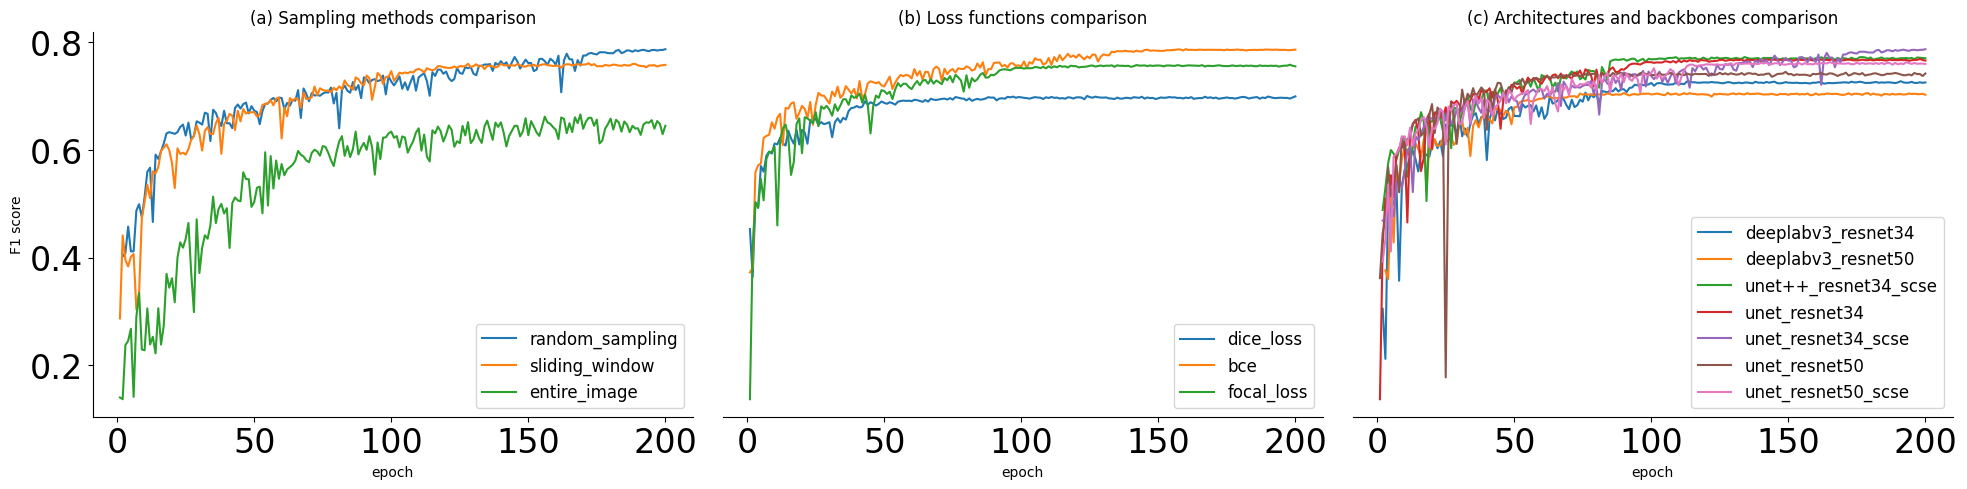

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(24, 5), gridspec_kw = {'wspace':0.05})
sampling_method_df.plot(x='epoch', y=sampling_method_ys, ax=ax[0])

# Hide the right and top spines
ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False)
ax[0].set_title('(a) Sampling methods comparison')

ax[0].set_ylabel('F1 score')

loss_functions_df.plot(x='epoch', y=loss_functions_ys, ax=ax[1])

# Hide the right and top spines
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.left.set_visible(False)
ax[1].set_yticks([])

ax[1].set_title('(b) Loss functions comparison')

architecture_df.plot(x='epoch', y=sorted(architecture_ys), ax=ax[2])

# Hide the right and top spines
ax[2].spines.right.set_visible(False)
ax[2].spines.left.set_visible(False)
ax[2].spines.top.set_visible(False)
ax[2].set_yticks([])
ax[2].set_title('(c) Architectures and backbones comparison')


# ax[0].title.set_size(10)
# ax[1].title.set_size(10)
# ax[2].title.set_size(10)

plt.savefig(loss_comparison_tensorboards_path / '../f1.png', bbox_inches='tight')